In [70]:
import pandas as pd
import numpy as np
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [71]:
df = pd.read_csv('datasets/Tweets.csv')
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Question 1:

In [72]:
tags = df['text'].str.extractall(r'(@\w+)')[0]
np.unique(tags.values).tofile('datasets/References.txt', sep=',', format='%s')

Question 2:

In [73]:
def extract_phrases(txt, phrase):
    sentences = sent_tokenize(txt)
    
    phrases = set()

    for sentence in sentences:
        words = word_tokenize(sentence)
        
        filtered_words = [word.lower() for word in words if word.lower() not in stopwords.words('english')]

        filtered_words = [word for word in filtered_words if word not in string.punctuation]
        
        tagged_words = nltk.pos_tag(filtered_words)
        
        for i in range(len(tagged_words)):
            if tagged_words[i][1].startswith(phrase):
                noun_phrase = ' '.join([tagged_words[j][0] for j in range(i, len(tagged_words))])
                phrases.add(noun_phrase)
    
    return phrases

In [74]:
def save_phrases_to_file(phrases, output_file):
    with open(output_file, 'w', encoding='utf-8') as file:
        for phrase in phrases:
            file.write(phrase + '\n')

In [75]:
df_neutral = df[df['airline_sentiment'] == 'neutral']
df_positive = df[df['airline_sentiment'] == 'positive']
df_negative = df[df['airline_sentiment'] == 'negative']

neutral_txt = '.'.join(df_neutral['text'])
positive_txt = '.'.join(df_positive['text'])
negative_txt = '.'.join(df_negative['text'])

In [76]:
neutral_np = extract_phrases(neutral_txt, 'NN')
positive_np = extract_phrases(positive_txt, 'NN')
negative_np = extract_phrases(negative_txt, 'NN')

In [77]:
save_phrases_to_file(neutral_np, f'datasets/Noun Phrases for Neutral Review.txt')
save_phrases_to_file(positive_np, f'datasets/Noun Phrases for Positive Review.txt')
save_phrases_to_file(negative_np, f'datasets/Noun Phrases for Negative Review.txt')

Question 3:

In [78]:
neutral_vp = extract_phrases(neutral_txt, 'VB')
positive_vp = extract_phrases(positive_txt, 'VB')
negative_vp = extract_phrases(negative_txt, 'VB')

In [79]:
save_phrases_to_file(neutral_vp, f'datasets/Verb Phrases for Neutral Review.txt')
save_phrases_to_file(positive_vp, f'datasets/Verb Phrases for Positive Review.txt')
save_phrases_to_file(negative_vp, f'datasets/Verb Phrases for Negative Review.txt')

Question 4:

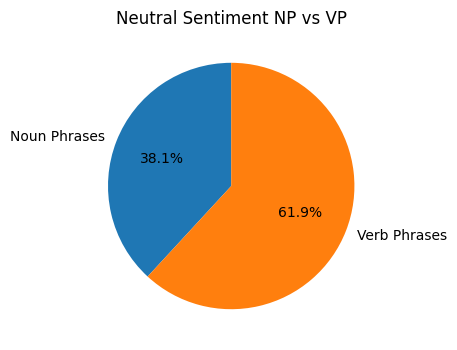

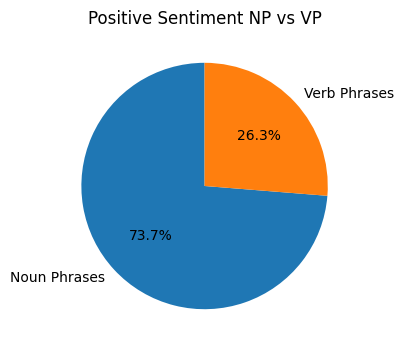

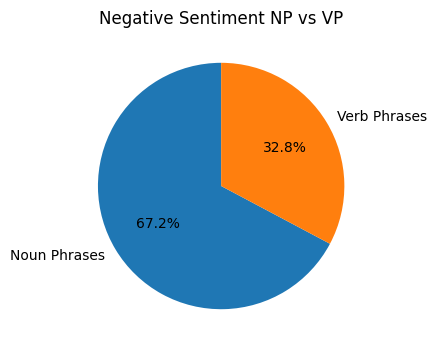

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.pie([len(neutral_np), len(negative_vp)], labels=['Noun Phrases', 'Verb Phrases'], autopct='%1.1f%%', startangle=90)
plt.title('Neutral Sentiment NP vs VP')

plt.figure(figsize=(4, 4))
plt.pie([len(positive_np), len(positive_vp)], labels=['Noun Phrases', 'Verb Phrases'], autopct='%1.1f%%', startangle=90)
plt.title('Positive Sentiment NP vs VP')

plt.figure(figsize=(4, 4))
plt.pie([len(negative_np), len(negative_vp)], labels=['Noun Phrases', 'Verb Phrases'], autopct='%1.1f%%', startangle=90)
plt.title('Negative Sentiment NP vs VP')

plt.show()